Data201 Group Project

Comparision of 40 Countries (grouped by their HDI index) to social and economic factors

Data sourced from http://hdr.undp.org/en/data

In [92]:
# Install tidyverse
library(tidyverse)

Read in the information from the CSV file Income_Index.csv

CSV file from the undp website, Source: http://hdr.undp.org/en/indicators/103606

In [93]:
# Read in information from CSV files
income_index <- read_csv("Income_Index.csv") 
glimpse(income_index)

Parsed with column specification:
cols(
  .default = col_double(),
  Country = col_character()
)
See spec(...) for full column specifications.


Observations: 195
Variables: 30
$ `HDI Rank (2017)` <dbl> 168, 68, 85, 35, 147, 70, 47, 83, 3, 20, 80, 54, ...
$ Country           <chr> "Afghanistan", "Albania", "Algeria", "Andorra", "...
$ `1990`            <dbl> NA, 0.575, 0.694, 0.904, 0.456, 0.755, 0.701, 0.5...
$ `1991`            <dbl> NA, 0.523, 0.686, 0.902, 0.453, 0.762, 0.719, 0.5...
$ `1992`            <dbl> NA, 0.510, 0.686, 0.897, 0.450, 0.762, 0.736, 0.4...
$ `1993`            <dbl> NA, 0.531, 0.681, 0.891, 0.403, 0.769, 0.743, 0.4...
$ `1994`            <dbl> NA, 0.547, 0.676, 0.890, 0.363, 0.775, 0.750, 0.4...
$ `1995`            <dbl> NA, 0.570, 0.677, 0.891, 0.443, 0.764, 0.743, 0.4...
$ `1996`            <dbl> NA, 0.585, 0.680, 0.897, 0.468, 0.770, 0.749, 0.4...
$ `1997`            <dbl> NA, 0.568, 0.680, 0.910, 0.485, 0.776, 0.759, 0.4...
$ `1998`            <dbl> NA, 0.582, 0.687, 0.915, 0.483, 0.779, 0.762, 0.4...
$ `1999`            <dbl> NA, 0.602, 0.688, 0.921, 0.473, 0.781, 0.755, 0.5...
$ `2000`            

Each column was automatically parsed in as a 'character' type. As there are many columns, it's easier to transform it to a long dataset first, so there are less columns to change to numeric values, and this is easier than specifing what type the columns should be parsed in as.

To filter out 4 groups of countries to compare (from most developed to less developed) we chose 10 that were the most developed, 10 the least developed and 10 from the 66% percentile and 10 from 33% percentile, using HDI index.

In [94]:
# Create vectors for the HDI indexes used in each group
highest <- c(1:10) # Most developed countries (1-10)
high <- c(54:63) # 66 Percentile (53-63)
low <- c(117:126) # 33 Percentile (116-126)
lowest <-c(179:189) # Least developted countries (179-189)

Sort the income_index dataset by HDI rank, convert to long dataframe

In [112]:
income_index <- income_index %>%
    arrange(`HDI Rank (2017)`) # Sort dataframe by HDI rank

# Create dataset for the highest HDI indexes
income_index_highest <- income_index %>%
    subset(HDI %in% highest) %>% # Select the countries from the dataset with the given indexes
    select(-(`HDI Rank (2017)`)) %>% # Remove HDI columns
    gather(key = Year, value = II, -Country) %>% # Create Long Database
    transform(Year = as.numeric(Year), check.names=FALSE)

income_index_high <- income_index2 %>%
    subset(HDI %in% high) %>%
    select(-(`HDI Rank (2017)`)) %>% # Remove HDI columns
    gather(key = Year, value = II, -Country) %>% # Create Long Database
    transform(Year = as.numeric(Year), check.names=FALSE)

income_index_low <- income_index2 %>%
    subset(HDI %in% low) %>%
    select(-(`HDI Rank (2017)`)) %>% # Remove HDI columns
    gather(key = Year, value = II, -Country) %>% # Create Long Database
    transform(Year = as.numeric(Year), check.names=FALSE)

income_index_lowest <- income_index2 %>%
    subset(HDI %in% lowest) %>%
    select(-(`HDI Rank (2017)`)) %>% # Remove HDI columns
    gather(key = Year, value = II, -Country) %>% # Create Long Database
    transform(Year = as.numeric(Year), check.names=FALSE)
income_index_high

Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
"NAs introduced by coercion"Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
"NAs introduced by coercion"Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
"NAs introduced by coercion"Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
"NAs introduced by coercion"

Country,Year,II
Bahamas,1990,0.858
Uruguay,1990,0.688
Kuwait,1990,0.949
Malaysia,1990,0.698
Barbados,1990,0.742
Kazakhstan,1990,0.744
Iran (Islamic Republic of),1990,0.716
Palau,1990,0.736
Seychelles,1990,0.753
Costa Rica,1990,0.653


ERROR while rich displaying an object: Error: Discrete value supplied to continuous scale

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(cap

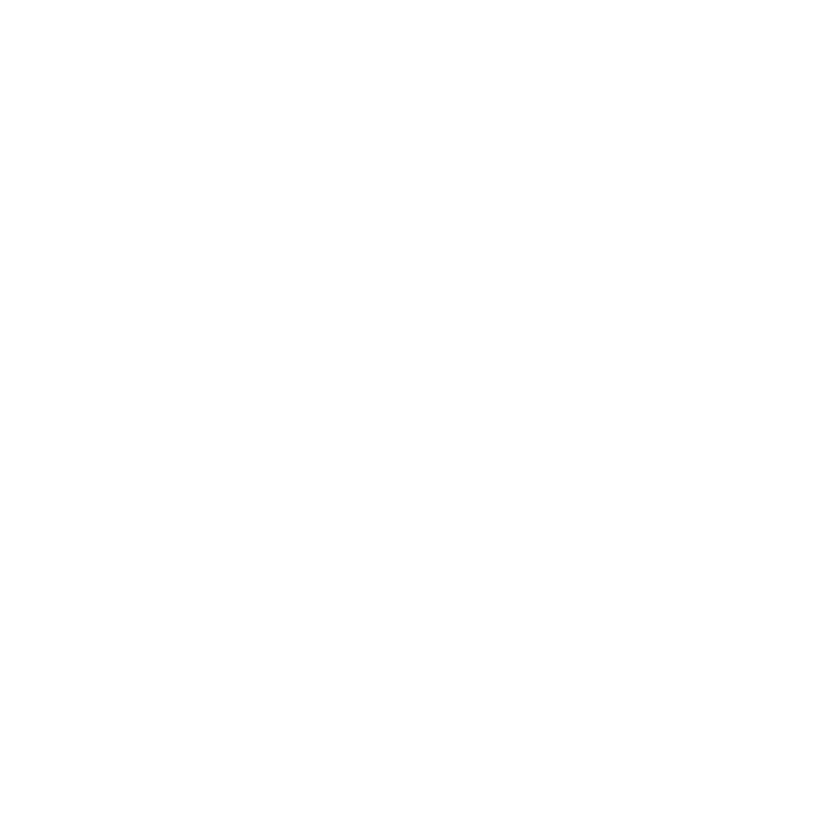

In [109]:
ggplot() + 
    geom_line(data = income_index_highest, aes(x = Year, y = II, group = Country, color = 'HDI 1-10'))  +
    geom_line(data = income_index_high, aes(x = Year, y = II, group = Country, color = 'HDI 53-63')) +
    geom_line(data = income_index_low, aes(x = Year, y = II, group = Country, color = 'HDI 116-126')) +
    geom_line(data = income_index_lowest, aes(x = Year, y = II, group = Country, color = 'HDI 179-189')) +
    scale_color_manual(values = c('HDI 1-10' = 'blue', 'HDI 53-63' = 'green', 'HDI 116-126' = 'yellow', 'HDI 179-189' = 'red')) +
    ggtitle('Income Index in comparison to HDI') + xlab('Year') + ylab('Income Index') + theme(legend.position = ("bottom"))

In [71]:
unemployment <- read_csv("Unemployment, total (% of labour force).csv") # Source: http://hdr.undp.org/en/indicators/140606
glimpse(unemployment)

Warning message:
"Missing column names filled in: 'X4' [4], 'X6' [6], 'X8' [8], 'X10' [10], 'X12' [12], 'X14' [14], 'X16' [16], 'X18' [18], 'X20' [20], 'X22' [22], 'X24' [24], 'X26' [26]"Parsed with column specification:
cols(
  .default = col_character()
)
See spec(...) for full column specifications.


Observations: 198
Variables: 26
$ `HDI Rank (2017)` <chr> "168", "68", "85", "147", "47", "83", "3", "20", ...
$ Country           <chr> "Afghanistan", "Albania", "Algeria", "Angola", "A...
$ `1991`            <chr> "12", "22.3", "20.6", "23.7", "5.6", "2", "9.6", ...
$ X4                <chr> "..", "..", "..", "..", "..", "..", "..", "..", "...
$ `1995`            <chr> "8.7", "23.9", "27.9", "23.9", "18.8", "6.7", "8....
$ X6                <chr> "..", "..", "..", "..", "..", "..", "..", "..", "...
$ `2000`            <chr> "11.2", "22.7", "29.8", "23.7", "15", "10.9", "6....
$ X8                <chr> "..", "..", "..", "..", "..", "..", "..", "..", "...
$ `2005`            <chr> "8.5", "17.5", "15.3", "21.4", "11.5", "8.2", "5"...
$ X10               <chr> "..", "..", "..", "..", "..", "..", "..", "..", "...
$ `2010`            <chr> "7.8", "14.2", "10", "9.9", "7.4", "19", "5.2", "...
$ X12               <chr> "..", "..", "..", "..", "..", "..", "..", "..", "...
$ `2011`            

In [65]:
# Filter out empty columns, sort by HDI rank 
unemployment2 <- unemployment %>%
    select(-starts_with("X")) %>% 
    transform(HDI = as.numeric(`HDI Rank (2017)`), check.names=FALSE) %>%
    arrange(HDI) %>%
    na.omit()

unemployment_highest <- unemployment2 %>%
    subset(HDI %in% highest) %>%
    select(-(`HDI Rank (2017)`)) %>% # Remove HDI column
    select(-(HDI)) %>% 
    gather(key = Year, value = Unemployment, -Country) %>%
    transform(Year = as.numeric(Year), Unemployment = as.numeric(Unemployment))

unemployment_high <- unemployment2 %>%
    subset(HDI %in% high) %>%
    select(-(`HDI Rank (2017)`)) %>% # Remove HDI column
    select(-(HDI)) %>% 
    gather(key = Year, value = Unemployment, -Country) %>%
    transform(Year = as.numeric(Year), Unemployment = as.numeric(Unemployment))

unemployment_low <- unemployment2 %>%
    subset(HDI %in% low) %>%
    select(-(`HDI Rank (2017)`)) %>% # Remove HDI column
    select(-(HDI)) %>% 
    gather(key = Year, value = Unemployment, -Country) %>%
    transform(Year = as.numeric(Year), Unemployment = as.numeric(Unemployment))

unemployment_lowest <- unemployment2 %>%
    subset(HDI %in% lowest) %>%
    select(-(`HDI Rank (2017)`)) %>% # Remove HDI column
    select(-(HDI)) %>% 
    gather(key = Year, value = Unemployment, -Country) %>%
    transform(Year = as.numeric(Year), Unemployment = as.numeric(Unemployment))


Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
"NAs introduced by coercion"Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
"NAs introduced by coercion"

Warning message:
"Removed 24 rows containing missing values (geom_path)."

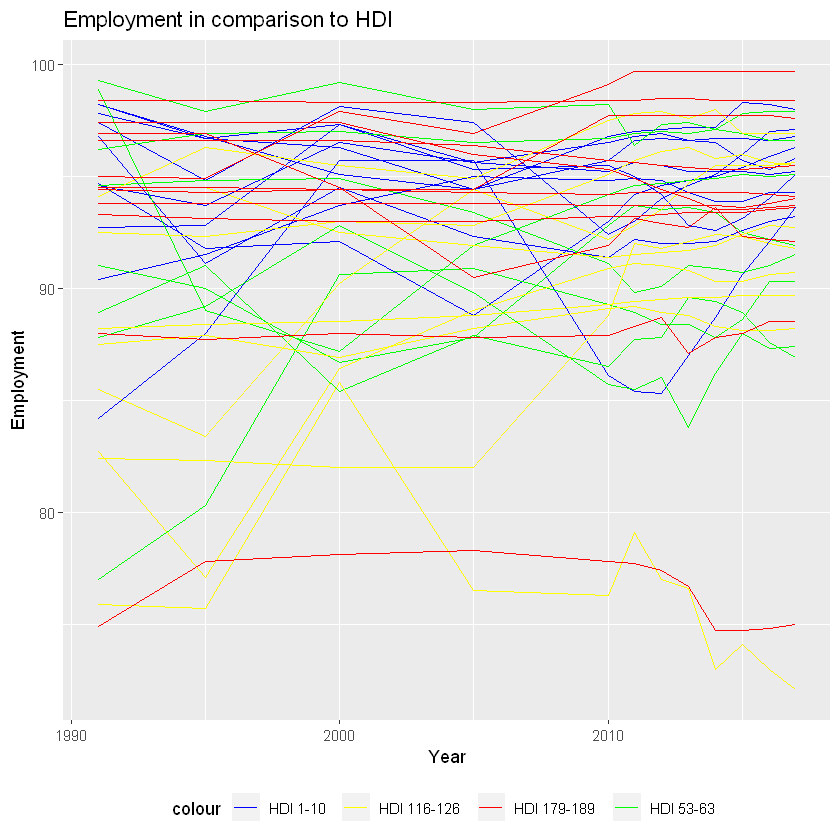

In [66]:
ggplot() + 
    geom_line(data = unemployment_highest, aes(x = Year, y = 100-Unemployment, group = Country, color = 'HDI 1-10'))  +
    geom_line(data = unemployment_high, aes(x = Year, y = 100-Unemployment, group = Country, color = 'HDI 53-63')) +
    geom_line(data = unemployment_low, aes(x = Year, y = 100-Unemployment, group = Country, color = 'HDI 116-126')) +
    geom_line(data = unemployment_lowest, aes(x = Year, y = 100-Unemployment, group = Country, color = 'HDI 179-189')) +
    scale_color_manual(values = c('HDI 1-10' = 'blue', 'HDI 53-63' = 'green', 'HDI 116-126' = 'yellow', 'HDI 179-189' = 'red')) +
    ggtitle('Employment in comparison to HDI') + xlab('Year') + ylab('Employment') + theme(legend.position = ("bottom"))

In [44]:
income_inequality <- read_csv("Income Inequality.csv")

income_inequality


Parsed with column specification:
cols(
  .default = col_character()
)
See spec(...) for full column specifications.


HDI Rank (2017),Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
168,Afghanistan,..,..,..,..,..,..,..,..,...,0.437,0.453,0.463,0.471,0.482,0.487,0.491,0.493,0.494,0.498
68,Albania,0.645,0.626,0.61,0.613,0.619,0.632,0.641,0.641,...,0.724,0.729,0.741,0.752,0.767,0.771,0.773,0.776,0.782,0.785
85,Algeria,0.577,0.581,0.587,0.591,0.595,0.6,0.608,0.617,...,0.709,0.719,0.729,0.736,0.74,0.745,0.747,0.749,0.753,0.754
35,Andorra,..,..,..,..,..,..,..,..,...,0.831,0.83,0.828,0.827,0.849,0.85,0.853,0.854,0.856,0.858
147,Angola,..,..,..,..,..,..,..,..,...,0.502,0.522,0.52,0.535,0.543,0.554,0.564,0.572,0.577,0.581
70,Antigua and Barbuda,..,..,..,..,..,..,..,..,...,0.777,0.77,0.766,0.762,0.765,0.768,0.77,0.775,0.778,0.78
47,Argentina,0.704,0.713,0.72,0.725,0.728,0.731,0.738,0.746,...,0.795,0.799,0.813,0.819,0.818,0.82,0.82,0.822,0.822,0.825
83,Armenia,0.631,0.628,0.58,0.588,0.599,0.605,0.612,0.623,...,0.727,0.724,0.728,0.731,0.737,0.742,0.745,0.748,0.749,0.755
3,Australia,0.866,0.867,0.868,0.872,0.875,0.883,0.886,0.889,...,0.92,0.921,0.923,0.925,0.929,0.931,0.933,0.936,0.938,0.939
20,Austria,0.795,0.8,0.805,0.807,0.813,0.817,0.82,0.824,...,0.884,0.886,0.895,0.897,0.899,0.897,0.901,0.903,0.906,0.908


In [45]:
# Filter out empty columns, and remove 1990 column, sort by HDI rank 
income_inequality2 <- income_inequality %>%
    select(-('1990')) %>%
    transform(HDI = as.numeric(`HDI Rank (2017)`),check.names=FALSE) %>%
    arrange(HDI) %>%
    na.omit()

income_inequality_highest <- income_inequality2 %>%
    subset(HDI %in% highest) %>%
    select(-(`HDI Rank (2017)`)) %>% # Remove HDI column
    select(-(HDI)) %>% 
    gather(key = Year, value = II, -Country) %>%
    transform(Year = as.numeric(Year), II = as.numeric(II), check.names=FALSE)

income_inequality_high <- income_inequality2 %>%
    subset(HDI %in% high) %>%
    select(-(`HDI Rank (2017)`)) %>% # Remove HDI column
    select(-(HDI)) %>% 
    gather(key = Year, value = II, -Country) %>%
    transform(Year = as.numeric(Year), II = as.numeric(II), check.names=FALSE)

income_inequality_low <- income_inequality2 %>%
    subset(HDI %in% low) %>%
    select(-(`HDI Rank (2017)`)) %>% # Remove HDI column
    select(-(HDI)) %>% 
    gather(key = Year, value = II, -Country) %>%
    transform(Year = as.numeric(Year), II = as.numeric(II), check.names=FALSE)

income_inequality_lowest <- income_inequality2 %>%
    subset(HDI %in% lowest) %>%
    select(-(`HDI Rank (2017)`)) %>% # Remove HDI column
    select(-(HDI)) %>% 
    gather(key = Year, value = II, -Country) %>%
    transform(Year = as.numeric(Year), II = as.numeric(II), check.names=FALSE)


Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
"NAs introduced by coercion"Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
"NAs introduced by coercion"Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
"NAs introduced by coercion"Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
"NAs introduced by coercion"

Warning message:
"Removed 27 rows containing missing values (geom_path)."Warning message:
"Removed 22 rows containing missing values (geom_path)."Warning message:
"Removed 45 rows containing missing values (geom_path)."

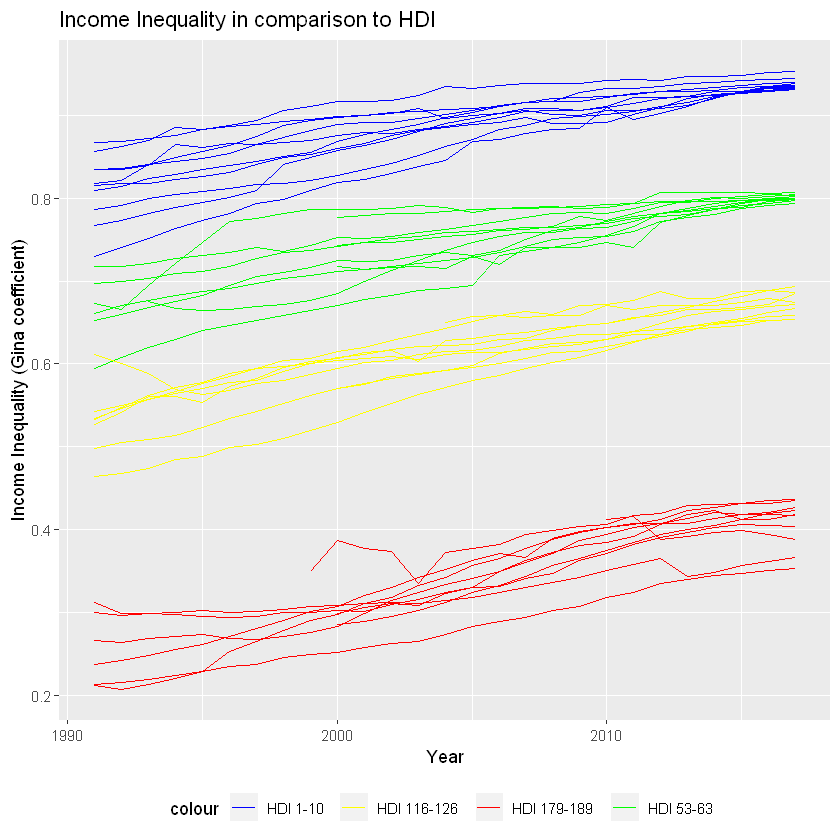

In [46]:
ggplot() + 
    geom_line(data = income_inequality_highest, aes(x = Year, y = II, group = Country, color = 'HDI 1-10'))  +
    geom_line(data = income_inequality_high, aes(x = Year, y = II, group = Country, color = 'HDI 53-63')) +
    geom_line(data = income_inequality_low, aes(x = Year, y = II, group = Country, color = 'HDI 116-126')) +
    geom_line(data = income_inequality_lowest, aes(x = Year, y = II, group = Country, color = 'HDI 179-189')) +
    scale_color_manual(values = c('HDI 1-10' = 'blue', 'HDI 53-63' = 'green', 'HDI 116-126' = 'yellow', 'HDI 179-189' = 'red')) +
    ggtitle('Income Inequality in comparison to HDI') + xlab('Year') + ylab('Income Inequality (Gina coefficient)') + theme(legend.position = ("bottom"))

In [47]:
male_employment <- read_csv("Labour force participation rate (% ages 15 and older), male.csv")
male_employment

Warning message:
"Missing column names filled in: 'X4' [4], 'X6' [6], 'X8' [8], 'X10' [10], 'X12' [12], 'X14' [14], 'X16' [16], 'X18' [18], 'X20' [20], 'X22' [22], 'X24' [24], 'X26' [26]"Parsed with column specification:
cols(
  .default = col_character()
)
See spec(...) for full column specifications.


HDI Rank (2017),Country,1990,X4,1995,X6,2000,X8,2005,X10,...,2013,X18,2014,X20,2015,X22,2016,X24,2017,X26
168,Afghanistan,86.7,..,86.4,..,86.5,..,87.1,..,...,86.6,..,86.6,..,86.7,..,86.7,..,86.7,a
68,Albania,74.4,..,73.7,..,73.6,..,67.9,..,...,62.7,..,63.9,..,65.2,..,65.1,..,64.9,a
85,Algeria,76.5,..,77.7,..,74.7,..,71.8,..,...,70.2,..,67.4,..,67.4,..,67.4,..,67.3,a
147,Angola,81.6,..,81.3,..,80.8,..,80.6,..,...,80.5,..,80.4,..,80.3,..,80.2,..,80.1,a
47,Argentina,75.5,..,75,..,75.4,..,75.6,..,...,73.9,..,73.5,..,73.4,..,73.4,..,73.2,a
83,Armenia,70.5,..,69.2,..,66.6,..,65.9,..,...,70.6,..,70.8,..,70.2,..,70.3,..,70.6,a
3,Australia,75.8,..,74,..,72.3,..,72.2,..,...,71.4,..,71,..,71.2,..,70.7,..,70.5,a
20,Austria,70,..,70.3,..,68.9,..,66.1,..,...,66.6,..,66.1,..,66,..,66.2,..,66,a
80,Azerbaijan,70.2,..,71.9,..,70.3,..,66,..,...,68,..,68.4,..,68.7,..,69.7,..,69.5,a
54,Bahamas,79.4,..,82.4,..,81.5,..,81.6,..,...,81.8,..,81.9,..,82,..,82,..,82,a


In [48]:
# Filter out empty columns, and remove 1990 column, sort by HDI rank 
male_employment2 <- male_employment %>%
    select(-starts_with("X")) %>% 
    select(-('1990')) %>%
    transform(HDI = as.numeric(`HDI Rank (2017)`),check.names=FALSE) %>%
    arrange(HDI) %>%
    na.omit()

male_employment_highest <- male_employment2 %>%
    subset(HDI %in% highest) %>%
    select(-(`HDI Rank (2017)`)) %>% # Remove HDI column
    select(-(HDI)) %>% 
    gather(key = Year, value = ME, -Country) %>%
    transform(Year = as.numeric(Year), ME = as.numeric(ME), check.names=FALSE)

male_employment_high <- male_employment2 %>%
    subset(HDI %in% high) %>%
    select(-(`HDI Rank (2017)`)) %>% # Remove HDI column
    select(-(HDI)) %>% 
    gather(key = Year, value = ME, -Country) %>%
    transform(Year = as.numeric(Year), ME = as.numeric(ME), check.names=FALSE)

male_employment_low <- male_employment2 %>%
    subset(HDI %in% low) %>%
    select(-(`HDI Rank (2017)`)) %>% # Remove HDI column
    select(-(HDI)) %>% 
    gather(key = Year, value = ME, -Country) %>%
    transform(Year = as.numeric(Year), ME = as.numeric(ME), check.names=FALSE)

male_employment_lowest <- male_employment2 %>%
    subset(HDI %in% lowest) %>%
    select(-(`HDI Rank (2017)`)) %>% # Remove HDI column
    select(-(HDI)) %>% 
    gather(key = Year, value = ME, -Country) %>%
    transform(Year = as.numeric(Year), ME = as.numeric(ME), check.names=FALSE)


Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
"NAs introduced by coercion"Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
"NAs introduced by coercion"

Warning message:
"Removed 22 rows containing missing values (geom_path)."

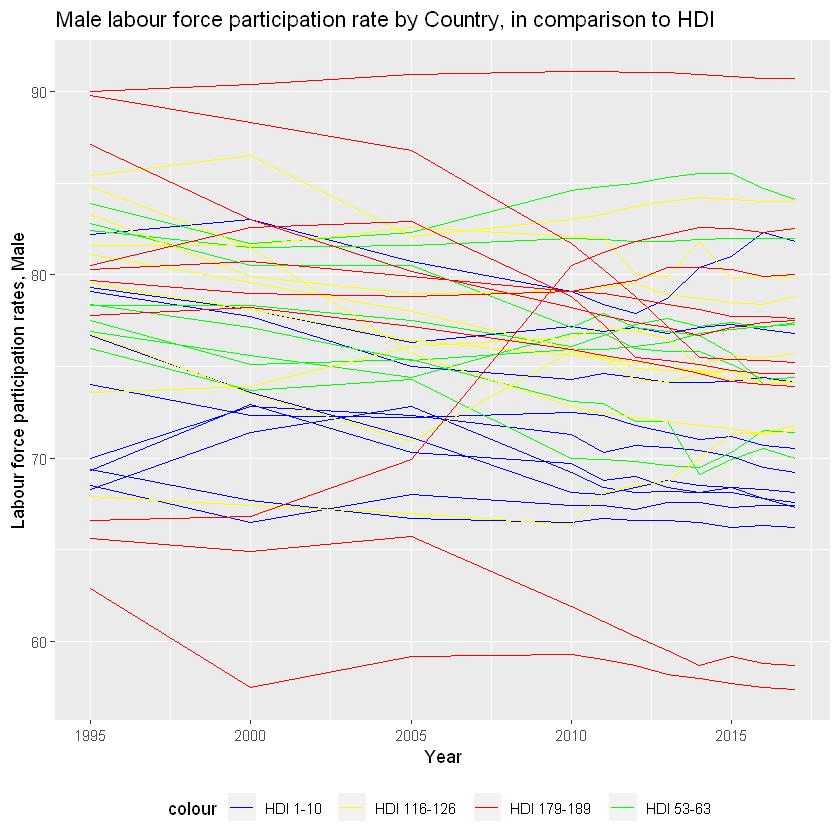

In [49]:
ggplot() + 
    geom_line(data = male_employment_highest, aes(x = Year, y = ME, group = Country, color = 'HDI 1-10'))  +
    geom_line(data = male_employment_high, aes(x = Year, y = ME, group = Country, color = 'HDI 53-63')) +
    geom_line(data = male_employment_low, aes(x = Year, y = ME, group = Country, color = 'HDI 116-126')) +
    geom_line(data = male_employment_lowest, aes(x = Year, y = ME, group = Country, color = 'HDI 179-189')) +
    scale_color_manual(values = c('HDI 1-10' = 'blue', 'HDI 53-63' = 'green', 'HDI 116-126' = 'yellow', 'HDI 179-189' = 'red')) +
    ggtitle('Male labour force participation rate by Country, in comparison to HDI') + xlab('Year') + ylab('Labour force participation rates, Male') + theme(legend.position = ("bottom"))

In [50]:
female_employment <- read_csv("Labour force participation rate (% ages 15 and older), female.csv")
female_employment

Warning message:
"Missing column names filled in: 'X4' [4], 'X6' [6], 'X8' [8], 'X10' [10], 'X12' [12], 'X14' [14], 'X16' [16], 'X18' [18], 'X20' [20], 'X22' [22], 'X24' [24], 'X26' [26]"Parsed with column specification:
cols(
  .default = col_character()
)
See spec(...) for full column specifications.


HDI Rank (2017),Country,1990,X4,1995,X6,2000,X8,2005,X10,...,2013,X18,2014,X20,2015,X22,2016,X24,2017,X26
168,Afghanistan,14.8,..,15,..,14.5,..,16.1,..,...,16.9,..,17.8,..,18.7,..,19.4,..,19.5,a
68,Albania,53.6,..,53.5,..,51.7,..,48.1,..,...,44.7,..,44.8,..,47.7,..,47.4,..,47.2,a
85,Algeria,11.5,..,11.8,..,11.9,..,12.8,..,...,16.9,..,15.3,..,15.2,..,15.1,..,15.2,a
147,Angola,75.2,..,74.7,..,74.7,..,74.9,..,...,75.4,..,75.4,..,75.4,..,75.3,..,75.3,a
47,Argentina,44.3,..,46.9,..,48.9,..,49.4,..,...,47.8,..,47.2,..,47.5,..,47.4,..,47.3,a
83,Armenia,49,..,48.8,..,48,..,47.5,..,...,52.7,..,52,..,51.2,..,51.2,..,51.4,a
3,Australia,52.3,..,53.7,..,54.6,..,57.1,..,...,58.7,..,58.7,..,59.1,..,59.2,..,59.2,a
20,Austria,43.4,..,48.8,..,48.9,..,50.7,..,...,54.6,..,54.6,..,54.5,..,55,..,55,a
80,Azerbaijan,52.1,..,56.2,..,57,..,61.1,..,...,61.3,..,61.9,..,62.5,..,63,..,62.9,a
54,Bahamas,64.8,..,68.3,..,69.2,..,69.9,..,...,70.1,..,70,..,69.9,..,69.8,..,70,a


In [51]:
# Filter out empty columns, and remove 1990 column, sort by HDI rank 
female_employment2 <- female_employment %>%
    select(-starts_with("X")) %>% 
    select(-('1990')) %>%
    transform(HDI = as.numeric(`HDI Rank (2017)`),check.names=FALSE) %>%
    arrange(HDI) %>%
    na.omit()

female_employment_highest <- female_employment2 %>%
    subset(HDI %in% highest) %>%
    select(-(`HDI Rank (2017)`)) %>% # Remove HDI column
    select(-(HDI)) %>% 
    gather(key = Year, value = FE, -Country) %>%
    transform(Year = as.numeric(Year), FE = as.numeric(FE), check.names=FALSE)

female_employment_high <- female_employment2 %>%
    subset(HDI %in% high) %>%
    select(-(`HDI Rank (2017)`)) %>% # Remove HDI column
    select(-(HDI)) %>% 
    gather(key = Year, value = FE, -Country) %>%
    transform(Year = as.numeric(Year), FE = as.numeric(FE), check.names=FALSE)

female_employment_low <- female_employment2 %>%
    subset(HDI %in% low) %>%
    select(-(`HDI Rank (2017)`)) %>% # Remove HDI column
    select(-(HDI)) %>% 
    gather(key = Year, value = FE, -Country) %>%
    transform(Year = as.numeric(Year), FE = as.numeric(FE), check.names=FALSE)

female_employment_lowest <- female_employment2 %>%
    subset(HDI %in% lowest) %>%
    select(-(`HDI Rank (2017)`)) %>% # Remove HDI column
    select(-(HDI)) %>% 
    gather(key = Year, value = FE, -Country) %>%
    transform(Year = as.numeric(Year), FE = as.numeric(FE), check.names=FALSE)

Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
"NAs introduced by coercion"Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
"NAs introduced by coercion"

Warning message:
"Removed 22 rows containing missing values (geom_path)."

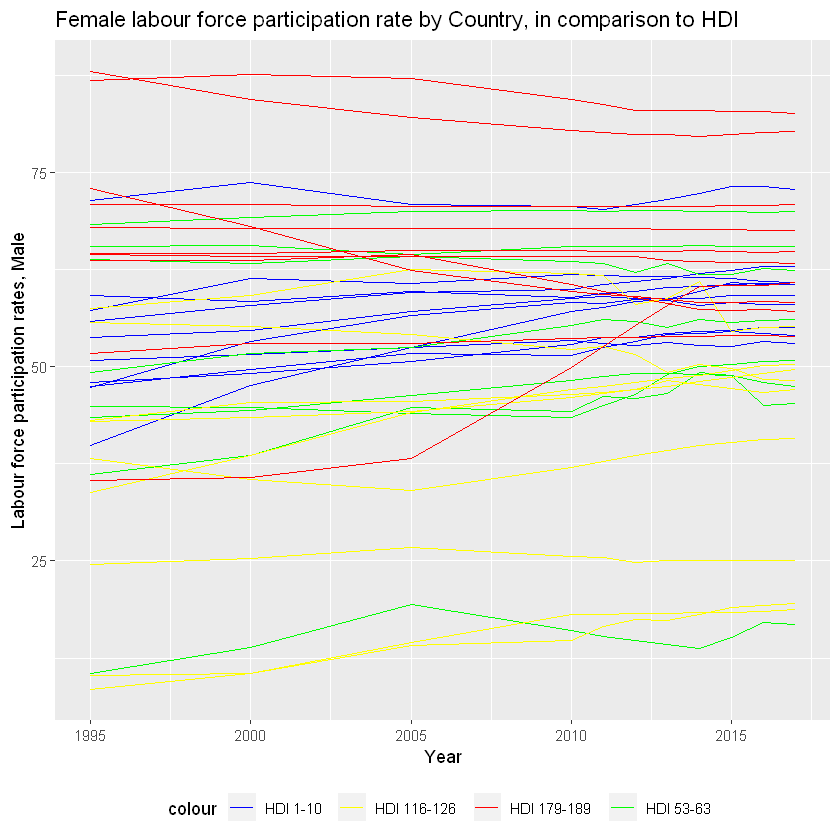

In [52]:
ggplot() + 
    geom_line(data = female_employment_highest, aes(x = Year, y = FE, group = Country, color = 'HDI 1-10'))  +
    geom_line(data = female_employment_high, aes(x = Year, y = FE, group = Country, color = 'HDI 53-63')) +
    geom_line(data = female_employment_low, aes(x = Year, y = FE, group = Country, color = 'HDI 116-126')) +
    geom_line(data = female_employment_lowest, aes(x = Year, y = FE, group = Country, color = 'HDI 179-189')) +
    scale_color_manual(values = c('HDI 1-10' = 'blue', 'HDI 53-63' = 'green', 'HDI 116-126' = 'yellow', 'HDI 179-189' = 'red')) +
    ggtitle('Female labour force participation rate by Country, in comparison to HDI') + xlab('Year') + ylab('Labour force participation rates, Male') + theme(legend.position = ("bottom"))

In [68]:
unemployment_countries <- unemployment2 %>%
    subset(HDI %in% highest | HDI %in% high | HDI %in% lowest | HDI %in% low)

unemployment_countries$Country

[1] "Norway"                           "Switzerland"                     
 [3] "Australia"                        "Ireland"                         
 [5] "Germany"                          "Iceland"                         
 [7] "Hong Kong, China (SAR)"           "Sweden"                          
 [9] "Singapore"                        "Netherlands"                     
[11] "Bahamas"                          "Uruguay"                         
[13] "Kuwait"                           "Malaysia"                        
[15] "Barbados"                         "Kazakhstan"                      
[17] "Iran (Islamic Republic of)"       "Palau"                           
[19] "Seychelles"                       "Costa Rica"                      
[21] "Bolivia (Plurinational State of)" "Palestine, State of"             
[23] "Iraq"                             "El Salvador"                     
[25] "Kyrgyzstan"                       "Morocco"                         
[27] "Nicaragua"                        "Cabo Verde"                      
[29] "Guyana"                           "Eritrea"                         
[31] "Mozambique"                       "Liberia"                         
[33] "Mali"                             "Burkina Faso"                    
[35] "Sierra Leone"                     "Burundi"                         
[37] "Chad"                             "South Sudan"                     
[39] "Central African Republic"         "Niger"